In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def center_data(X):
    mean_vals = np.mean(X, axis=0)
    centered_data = X - mean_vals
    return centered_data, mean_vals

In [3]:
def svd(X, num_components=None):
    centered_data, mean_vals = center_data(X)
    U, S, VT = np.linalg.svd(centered_data, full_matrices=False)
    if num_components is not None:
        U = U[:, :num_components]
        S = S[:num_components]
        VT = VT[:num_components, :]
    return U, S, VT, mean_vals

In [4]:
def reconstruct_image(U, S, VT, mean_vals, original_shape):
    centered_reconstructed = np.dot(U, np.dot(np.diag(S), VT))
    reconstructed_data = centered_reconstructed + mean_vals
    reconstructed_data = np.clip(reconstructed_data, 0, 255)
    reconstructed_image = reconstructed_data.reshape(original_shape)
    return reconstructed_image.astype(np.uint8)

In [5]:
def compress_image_with_svd(image_path, num_components):
    image = Image.open(image_path).convert('L')
    X = np.array(image)
    original_shape = X.shape
    original_size = X.size
    U, S, VT, mean_vals = svd(X, num_components=num_components)
    compressed_image = reconstruct_image(U, S, VT, mean_vals, X.shape)
    compressed_size = U.size + S.size + VT.size
    
    return compressed_image, original_shape, original_size, compressed_size

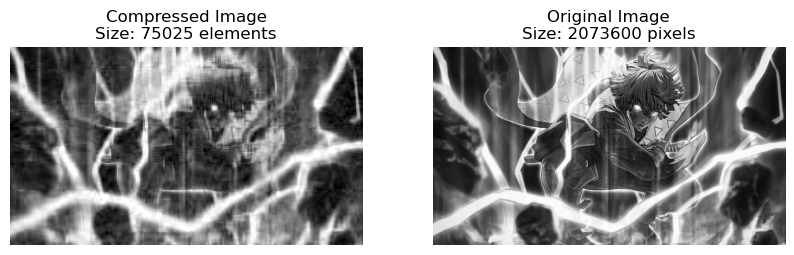

Original Image Size: 1920x1080 pixels, 2073600 elements total
Compressed Size: 75025 elements total
Compression Ratio: 27.64:1


In [8]:
image_path = 'TestImage1.jpg'  
num_components = 25
compressed_image, original_shape, original_size, compressed_size = compress_image_with_svd(image_path, num_components)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Image\nSize: {compressed_size} elements')
plt.axis('off')

plt.subplot(1, 2, 2)
original_img = Image.open(image_path).convert('L')
plt.imshow(original_img, cmap='gray')
plt.title(f'Original Image\nSize: {original_size} pixels')
plt.axis('off')

plt.show()

print(f'Original Image Size: {original_shape[1]}x{original_shape[0]} pixels, {original_size} elements total')
print(f'Compressed Size: {compressed_size} elements total')
compression_ratio = original_size / compressed_size
print(f'Compression Ratio: {compression_ratio:.2f}:1')